# CNN Algorithm for classification

### Import libraries

In [1]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras import datasets, layers, models
import sklearn
from sklearn.metrics import accuracy_score
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense
from tensorflow.keras.layers import MaxPooling2D, Activation, Flatten, Dropout
from keras import optimizers
from tensorflow.keras import optimizers
from keras.models import Sequential
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Define global variables and dataset

In [2]:
## initial parameters
lr = 1e-2
batch_size = 40
epochs = 100
img_dims = (250,250,3) #specifying image dimensions

data = []
labels = []

# loading image files
image_files = [f for f in glob.glob(r'D:\Individual_Trees_photos/segall' + "/**/*",
recursive=True) if not os.path.isdir(f)]

random.shuffle(image_files)



### label

In [3]:
## converting images to arrays 
for img in image_files:

    image = cv2.imread(img)
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    ## labelling the categories
    label = img.split(os.path.sep)[-2] 
    if label == "European beech":
        label = 0
    elif label == "European silver fir":
          label = 1
        
    elif label == "Norway spruce":
        label = 2
        
    else: 
        label = 3
    labels.append([label])  # [[1], [0], [0], ...]

In [4]:
print (labels)

[[2], [3], [3], [2], [3], [0], [2], [1], [1], [2], [2], [1], [0], [2], [1], [1], [0], [0], [2], [3], [0], [1], [3], [1], [2], [2], [0], [0], [3], [2], [2], [2], [2], [3], [0], [0], [0], [3], [3], [2], [1], [3], [0], [2], [2], [2], [1], [3], [0], [1], [2], [2], [2], [2], [2], [1], [3], [1], [3], [1], [2], [0], [1], [2], [2], [1], [1], [0], [1], [2], [0], [2], [3], [2], [2], [3], [3], [2], [3], [2], [1], [3], [0], [2], [1], [3], [0], [1], [2], [3], [0], [3], [3], [2], [3], [3], [2], [3], [2], [3], [0], [0], [3], [2], [2], [3], [2], [2], [2], [0], [1], [1], [1], [0], [1], [2], [3], [1], [2], [1], [2], [3], [1], [3], [0], [2], [0], [0], [1], [0], [2], [3], [3], [2], [3], [2], [1], [3], [2], [1], [2], [0], [3], [1], [0], [0], [2], [3], [1], [1], [2], [1], [0], [3], [1], [0], [1], [2], [3], [3], [3], [0], [1], [0], [1], [3], [1], [2], [3], [3], [3], [1], [3], [1], [1], [0], [1], [1], [2], [2], [2], [1], [3], [1], [0], [0], [3], [3], [1], [2], [1], [2], [1], [1], [2], [0], [3], [2], [2], [1],

### Train-test split

In [5]:
## pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## split dataset for training and validation
x_train,x_test,y_train,y_test = train_test_split(data, labels,
test_size=0.2)

## converting into categorical labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [6]:
# augmenting the dataset 
#aug = ImageDataGenerator(rotation_range=25, 
#                         width_shift_range=0.1,
 #                        height_shift_range=0.1,
  #                       shear_range=0.2, 
   #                      zoom_range=0.2,
    #                     horizontal_flip=True, 
     #                    fill_mode="nearest")




### CNN model

In [8]:
model_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(250,250,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
        layers.MaxPool2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
        layers.MaxPool2D((2,2)),
#         layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dropout(0.5),
    
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')             
])

### Compile the model

In [9]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

### Fit the model

In [10]:

history=model_cnn.fit(x_train, y_train, epochs=40, batch_size=12, 
          validation_split = 0.2,
          verbose=1,)

Epoch 1/40
73/73 [==============================] - 33s 438ms/step - loss: 1.3794 - acc: 0.2815 - val_loss: 1.3514 - val_acc: 0.3653
Epoch 2/40
73/73 [==============================] - 32s 433ms/step - loss: 1.2082 - acc: 0.4622 - val_loss: 1.0240 - val_acc: 0.6119
Epoch 3/40
73/73 [==============================] - 32s 435ms/step - loss: 0.8696 - acc: 0.6487 - val_loss: 0.8762 - val_acc: 0.6895
Epoch 4/40
73/73 [==============================] - 32s 436ms/step - loss: 0.7163 - acc: 0.6899 - val_loss: 0.8331 - val_acc: 0.6301
Epoch 5/40
73/73 [==============================] - 32s 438ms/step - loss: 0.6364 - acc: 0.7368 - val_loss: 0.6886 - val_acc: 0.6941
Epoch 6/40
73/73 [==============================] - 32s 436ms/step - loss: 0.5475 - acc: 0.7929 - val_loss: 0.5441 - val_acc: 0.7443
Epoch 7/40
73/73 [==============================] - 32s 436ms/step - loss: 0.4886 - acc: 0.8066 - val_loss: 0.4300 - val_acc: 0.8174
Epoch 8/40
73/73 [==============================] - 32s 436ms/step - 

### Model evaluation

In [11]:
model_cnn.evaluate(x_test,y_test)

9/9 [==============================] - 2s 250ms/step - loss: 0.1492 - acc: 0.9599


[0.14917835593223572, 0.959854006767273]

### Prediction

In [12]:
Y_pred = model_cnn.predict([x_test])
y_pred=np.argmax(Y_pred, axis=1)
loss= model_cnn.evaluate( x_test,y_test)
print(loss)
print("Baseline Error: %.2f%%" % (100-loss[1]*100))

9/9 [==============================] - 2s 250ms/step - loss: 0.1492 - acc: 0.9599
[0.14917835593223572, 0.959854006767273]
Baseline Error: 4.01%


In [13]:
Y_test=np.argmax(y_test, axis=1)
accuracy_score(Y_test, np.argmax(Y_pred, axis=1))

0.9598540145985401

([<matplotlib.axis.YTick at 0x275d930f880>,
 [Text(0, 0.5, 'European beech'),
  Text(0, 1.5, 'European silver fir'),
  Text(0, 2.5, 'Norway spruce'),
  Text(0, 3.5, 'Sessile oak')])

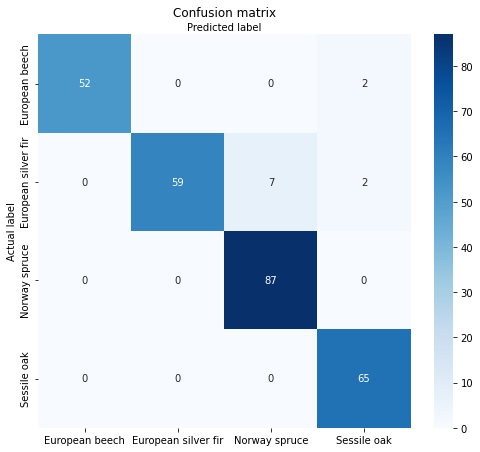

In [14]:
matrix= confusion_matrix(Y_test, y_pred)

class_names=['European beech', 'European silver fir', 'Norway spruce', 'Sessile oak'] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label') 
plt.ylabel('Actual label')
tick_marks = [0.5, 1.5,2.5,3.5]
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

### Classification report

In [15]:

print (classification_report(Y_test, np.argmax(Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       1.00      0.87      0.93        68
           2       0.93      1.00      0.96        87
           3       0.94      1.00      0.97        65

    accuracy                           0.96       274
   macro avg       0.97      0.96      0.96       274
weighted avg       0.96      0.96      0.96       274



<AxesSubplot:>

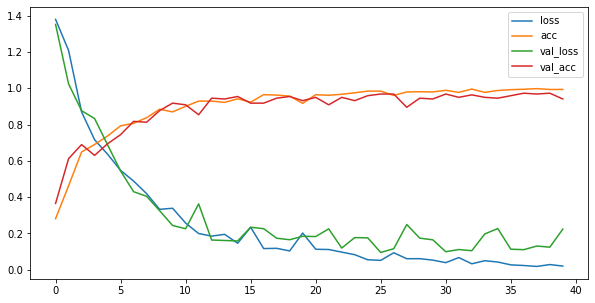

In [16]:
# Getting the model training history
model_history = history.history

# Model history into a pandas dataframe
loss_acc_df = pd.DataFrame(model_history)

# Plotting the loss and accuracy 

loss_acc_df.plot(figsize=(10,5))

In [17]:
acc = model_history['acc']
val_acc = model_history['val_acc']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history.epoch

# function to plot accuracy 

def plot_acc(acc, val_acc, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

def plot_loss(loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)
  plt.figure()

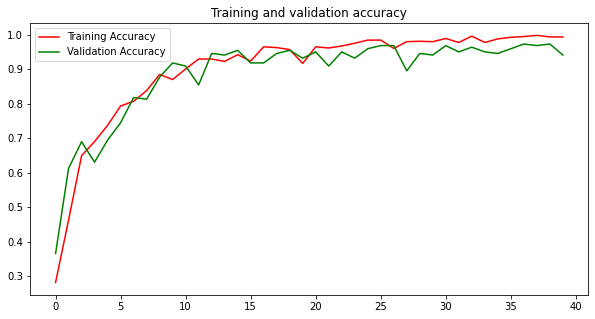

<Figure size 432x288 with 0 Axes>

In [18]:
#Plotting acc

plot_acc(acc, val_acc, epochs)

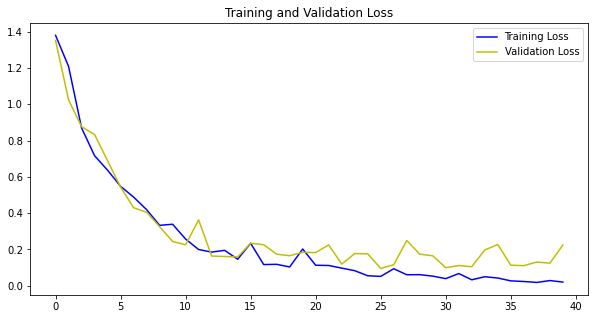

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot loss 

plot_loss(loss, val_loss, epochs)

#### Saving and Loading the Model for Prediction

In [20]:
# Saving a model

# model_cnn.save('Model cnn copy5.h5')

In [21]:
# Loading a saved model
from keras.models import load_model

# load_cnn = load_model('Model cnn copy5.h5')

In [22]:
# load_cnn.summary()